<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 300, align = "center"></a>
# <center>K-Means Clustering</center>

<img src = "https://ibm.box.com/shared/static/860wrw1jvullt57vl470fe7zikucwzzh.png", height = 400, width = 400, align = 'right'>
<img src = "https://ibm.box.com/shared/static/f7wewzfjxozemzlhsf7tay1me0alyofa.png", height = 150, width = 150, align = 'left'>

### <b>Welcome to Lab 4a of Machine Learning 101 with Python.</b>
<p><b>Machine Learning is a form of artificial intelligence (AI), where the system can "learn" without explicitly being coded</b></p>

In this lab exercise, you will learn about <b>unsupervised learning</b>, namely about <b>k-means clustering</b></b>.

### Some Notebook Commands Reminders:
<ul>
    <li>Run a cell: CTRL + ENTER</li>
    <li>Create a cell above a cell: a</li>
    <li>Create a cell below a cell: b</li>
    <li>Change a cell to Markdown: m</li>
    
    <li>Change a cell to code: y</li>
</ul>

<b> If you are interested in more keyboard shortcuts, go to Help -> Keyboard Shortcuts </b>

<b> <i> Before starting the lab, please run the following code in order to access the solutions </i> </b>

In [1]:
from IPython.core.display import HTML
HTML("""
<style type="text/css">
    #ans:hover { background-color: black; }
    #ans {padding: 6px; 
        background-color: white; 
        border: green 2px solid;
        font-weight: bold}
</style>
""") 

# <u> K-means Clustering</u> 
In this lab we will start looking at the Unsupervised Learning Algorithm, <b>K-means clustering</b>.

### Import the following libraries:
<ul>
    <li> <b>random</b> </li>
    <li> <b>numpy as np</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
    <li> <b>KMeans from sklearn.cluster</b> </li>
    <li> <b>make_blobs from sklearn.datasets.samples_generator</b> </li>
</ul>
<br>
Also run <b> %matplotlib inline </b> since we will be plotting in this section.

In [0]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

Hover over the green box below for the answer
<p id = "ans"> <font color = "white">
import random <br>
import numpy as np <br>
import matplotlib.pyplot as plt <br>
from sklearn.cluster import KMeans <br>
from sklearn.datasets.samples_generator import make_blobs <br>
%matplotlib inline
</font> </p>

---
We are switching gears from <b> Supervised </b> Learning to <b> Unsupervised </b> Learning. So we won't be able to use the skulls dataset anymore because it's a <i> labeled </i> dataset.
<br>
## Generating Random Data
So we will be creating our own dataset!


First we need to set up a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b> <br>ex. random.seed(0)

In [0]:
np.random.seed(0)

Hover over the green box below for the answer
<p id = "ans"> <font color = "white">
np.random.seed(0)
</font> </p>

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [0]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [21]:
print X[:5]
print X[:5,0]
print y[:5]

[[-1.63241987 -1.81745778]
 [ 2.41696108 -2.71090582]
 [-0.26817906 -3.44968479]
 [ 1.71578166 -3.22483636]
 [ 1.78666211  0.11456614]]
[-1.63241987  2.41696108 -0.26817906  1.71578166  1.78666211]
[1 2 2 2 3]


Hover over the green box below for the answer
<p id = "ans"> <font color = "white">
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
</font> </p>

Display the scatter plot of the randomly generated data.

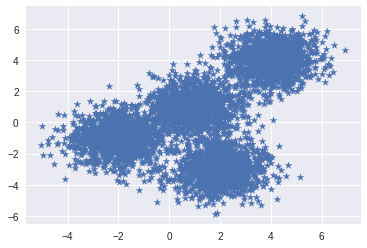

In [23]:
plt.scatter(X[:, 0], X[:, 1], marker='*')

---
## Setting up K-Means
Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n\_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n\_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n\_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Hover over the green box below for the answer
<p id = "ans"> <font color = "white">
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
</font> </p>

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>

In [25]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Hover over the green box below for the answer
<p id = "ans"> <font color = "white">
k_means.fit(X)
</font> </p>

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b> 

In [31]:
dir(k_means)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_fit_data',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

In [28]:
k_means_labels = k_means.labels_
print k_means_labels[:5]

[3 0 0 0 2]


Hover over the green box below for the answer
<p id = "ans"> <font color = "white">
k_means_labels = k_means.labels&#95;
</font> </p>

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster&#95;centers&#95; </b> and save it as <b> k_means_cluster_centers </b>

In [30]:
k_means_cluster_centers = k_means.cluster_centers_
print k_means_cluster_centers

[[ 1.94908497 -2.9587464 ]
 [ 4.01428846  4.02014269]
 [ 1.02445925  1.05616305]
 [-2.06346616 -1.01296578]]


Hover over the green box below for the answer
<p id = "ans"> <font color = "white">
k_means_cluster_centers = k_means.cluster&#95;centers&#95;
</font> </p>


---
## Creating the Visual Plot
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

Please read through the code and comments to understand how to plot the model.

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


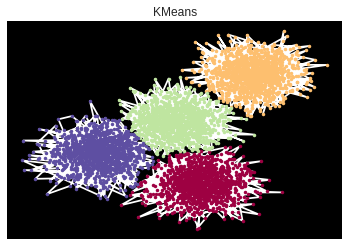

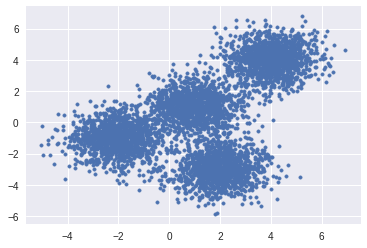

In [32]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot with a black background (background is black because we can see the points
# connection to the centroid.
ax = fig.add_subplot(1, 1, 1, axisbg = 'black')

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[2, 2], [-2, -1], [4, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

# Display the scatter plot from above for comparison.
plt.scatter(X[:, 0], X[:, 1], marker='.')

## <u>Unsupervised Learning - K-means Clustering</u>

Now, unsupervised learning is a bit <b>harder</b> to setup as it is where you don't have the <b>labels</b> for the categories in advanced and you try to <b>group</b> them based on their <b>similarities</b>. So for this portion we will be giving you the code to run as an <b>introduction</b> to an <b>algorithm</b> that can be used in <b>unsupervised learning - k-means clustering</b>. However, that doesn't mean you can't <b>practice</b> loading and setting up the data!

### Importing Libraries

Import the following libraries: 
<ol>- Axes3D from mpl_toolkits.mplot3d</ol>
<ol>- KMeans from sklearn.cluster</ol>
<ol>- load_iris from sklearn.datasets</ol>

<i>Note: It is presumed that numpy and matplotlib.pyplot are both imported as np and plt respectively from previous imports. If that is not the case, please import them!</i>

In [0]:
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris

Hover over the green box below for the answer
<p id = "ans"> 
<font color = "white"> from mpl_toolkits.mplot3d import Axes3D <br>
from sklearn.cluster import KMeans <br>
from sklearn.datasets import load_iris </font>
</p>

Then we will set the <b>random seed</b> and the <b>centers</b> for <b>K-means</b>.

In [0]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

Using the <b> load_iris() </b> function, declare the iris datset as the variable <b>iris</b>

In [0]:
iris=load_iris()

In [37]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

Hover over the green box below for the answer
<p id = "ans"> 
<font color = "white"> iris = load_iris()</font>
</p>

Also declare <b>X</b> as the <b>iris' data component</b>, and y as <b>iris' target component</b>

In [38]:
X=iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Hover over the green box below for the answer
<p id = "ans"> 
<font color = "white">
X = iris.data <br>
y = iris.target </font>
</p>

In [39]:
y=iris.target
y[:5]

array([0, 0, 0, 0, 0])

Now let's run the rest of the code and see what <b>K-Means produces!</b>

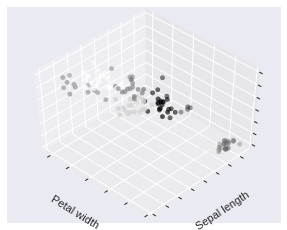

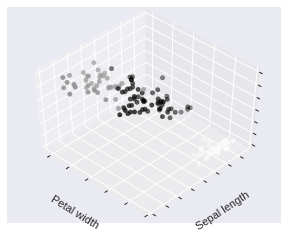

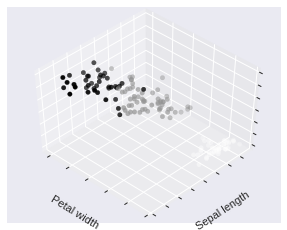

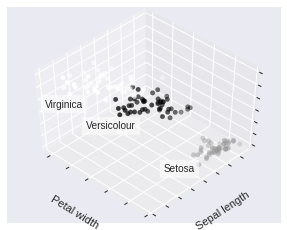

In [40]:
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

<i>Note: You are able to expand the graph by dragging the arrow at the bottom right hand corner of the graph </i>

The following <b>plots</b> (1-3) show the different <b>end results</b> you obtain by using different <b>initalization processes</b>. <b>Plot 4</b> holds what the answer should be, however it is clear that <b>K-means</b> is <b>heavily reliant</b> on the <b>initalization</b> of the <b>centroid</b>.

The focus of this exercise is to <b>introduce</b> you to <b>basic training</b>, <b>testing</b>, and <b>plotting</b>. At this time, it's <b>not very important</b> to understand exactly how these <b>algorithms work</b>, as they will be explained in later lessons.

Don't worry if it these algorithms are a bit confusing, this exercise is to make you <b>think about how algorithms</b> are affected by their <b>components</b> and what may <b>result</b> in a slight <b>change</b> or <b>variation</b>. The question is... How do we evaluate their <b>validity??</b>

<i>Note: For more information on the last example follow the link: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html </i>

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0101EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0101EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0101EN_DSX)

---
# Additional Resources
<br>
General Clustering: http://scikit-learn.org/stable/modules/clustering.html 
<br><br>
K-Means Clustering: <br>
http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/kmeans.html<br>
https://www.youtube.com/watch?v=_aWzGGNrcic

<hr>
Copyright &copy; 2016 [Big Data University](https://bigdatauniversity.com/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​